## Module 7 Assignment 1: Digit Recognizer
# Requirements
1. Conduct your analysis using a cross-validation design.
2. Conduct / refine EDA.
3. Conduct Design of Experiments to evaluate the performance of various neural networks by changing the layers and nodes. 
   Tested neural network structures should be explored within a benchmark experiment, a 2x2 completely crossed design. 
   An example of a completely crossed designed with {2, 5} layers and {10,20} nodes follows.
   <img src="image.png">

4. Due to the time required to fit each neural network, we will observe only one trial for each cell in the design. 
5. You will build your models on csv and submit your forecasts for test.csv to Kaggle.com, providing your name and user ID for each experimental trial. 
6. Evaluate goodness of fit metrics on the training and validation sets.
7. Provide a multi-class confusion matrix.
8. Discuss how your models performed.


In [1]:
#!conda create -n tensorflow --yes
#!activate tensorflow
#!pip install --upgrade tensorflow

In [2]:
#!conda activate tensorflow
#!conda deactivate tensorflow --> at the end of the notebook

In [27]:
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#!conda install --yes xgboost
import xgboost

%matplotlib inline
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#features
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, MinMaxScaler

#stats model
from sklearn import datasets, linear_model
import statsmodels.formula.api as smf

# Model Selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
#!conda install --yes lightgbm
from lightgbm import LGBMClassifier
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score

# Model Accuracy
from sklearn import metrics
from sklearn.metrics import r2_score, accuracy_score, mean_poisson_deviance, mean_squared_error 

# Import librairies
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier

import sklearn.metrics as metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

from sklearn.tree import export_graphviz
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

# gradient boosting for classification in scikit-learn
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

from datetime import datetime 

import sys
import sklearn
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans

import tensorflow as tf
print("You are using TensorFlow version", tf.__version__)
#if len(tf.config.list_physical_devices('GPU')) > 0:
#  print("You have a GPU enabled.")
#else:
#  print("Enable a GPU before running this notebook.")
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential  # initial NN
from tensorflow.keras.layers import Input, Dense, Activation, Dropout, InputLayer, BatchNormalization # construct each layer
from tensorflow.keras.layers import Conv2D # swipe across the image by 1
from tensorflow.keras.layers import MaxPool2D, GlobalMaxPool2D # swipe across by pool size
from tensorflow.keras.layers import Flatten, GlobalAveragePooling2D

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau,LearningRateScheduler, TensorBoard, EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy, binary_crossentropy, mean_squared_error,sparse_categorical_crossentropy

from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.utils import to_categorical

import pandas as pd
import numpy as np
import os
import cv2
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
%matplotlib inline
from tqdm.notebook import trange,tqdm
from IPython.display import Image, display, Markdown, clear_output

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import svm, metrics
from sklearn.decomposition import PCA
from skimage import io
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

# # tensorflow libraries
# import tensorflow as tf
# from keras.models import Sequential
# from keras.layers import Input,Conv2D,Activation,Dense,Lambda,Flatten,Embedding,PReLU,BatchNormalization,Dropout,MaxPooling2D,GlobalMaxPooling2D,GlobalAveragePooling2D
# from sklearn.model_selection import train_test_split
# from keras.models import Model
# from keras import backend as K

You are using TensorFlow version 2.7.0


In [4]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
train =pd.read_csv('digit-recognizer/train.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

In [6]:
test = pd.read_csv('digit-recognizer/test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel

In [7]:
train.isnull().sum().any()

False

In [8]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


<AxesSubplot:xlabel='label', ylabel='Count'>

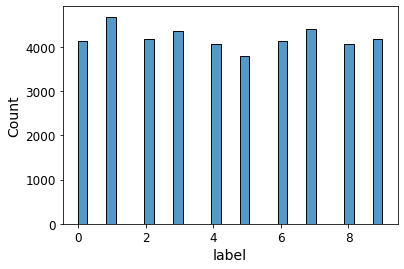

In [9]:
sns.histplot(data=train, x="label")

In [11]:
X, y = train.drop('label', 1).values, train.label.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1, stratify=y)

X_train = X_train.reshape(-1,28,28)
X_test = X_test.reshape(-1,28,28)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(37800, 28, 28)
(37800,)
(4200, 28, 28)
(4200,)


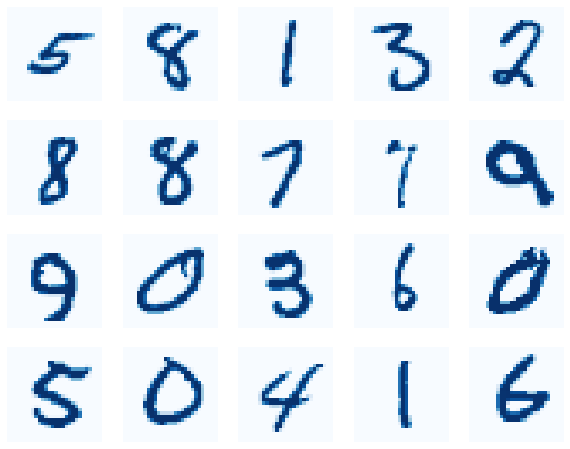

In [13]:
# Visulize data
rows = 4 # defining no. of rows in figure
cols = 5 # defining no. of colums in figure

f = plt.figure(figsize=(2*cols,2*rows)) # defining a figure 

for i in range(rows*cols): 
    f.add_subplot(rows,cols,i+1) # adding sub plot to figure on each iteration
    plt.imshow(X_train[i].reshape([28,28]), cmap="Blues") 
    plt.axis("off")

In [14]:
%%time

X_train = X_train.astype('uint8')
X_test = X_test.astype('uint8')


kernel = np.ones(shape=(3,3), dtype=np.uint8)

for i, image in enumerate(X_train):
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel, iterations=1)
    image = np.expand_dims(image, axis=0)
    X_train = np.concatenate((X_train, image), axis=0)
    y_train = np.concatenate((y_train, np.array([y_train[i]])), axis=0)

CPU times: user 6min 14s, sys: 4min 51s, total: 11min 5s
Wall time: 11min 7s


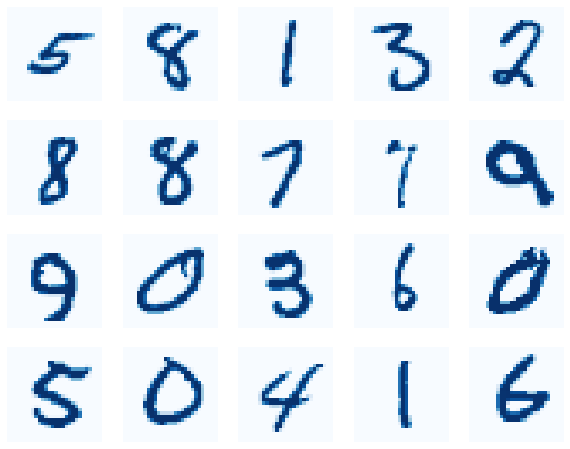

In [15]:
# Visulize data
rows = 4 # defining no. of rows in figure
cols = 5 # defining no. of colums in figure

f = plt.figure(figsize=(2*cols,2*rows)) # defining a figure 

for i in range(rows*cols): 
    f.add_subplot(rows,cols,i+1) # adding sub plot to figure on each iteration
    plt.imshow(X_train[i].reshape([28,28]), cmap="Blues") 
    plt.axis("off")

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(75600, 28, 28)
(75600,)
(4200, 28, 28)
(4200,)


In [17]:
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(75600, 28, 28, 1)
(75600,)
(4200, 28, 28, 1)
(4200,)


In [18]:
def unpickle(file):
    with open(file, 'rb') as fo:
        qmnist = pickle.load(fo, encoding='bytes')
    return qmnist

In [23]:
qmnist = unpickle("extended_dataset_MNIST/MNIST-120k")

data = qmnist['data']
labels = qmnist['labels']

data.shape, labels.shape

((120000, 28, 28), (120000, 1))

In [24]:
X_qmnist = np.expand_dims(data, axis=-1)
y_qmnist = np.squeeze(labels)

In [25]:
X_train_full = np.concatenate((X_train, X_qmnist), axis=0)
y_train_full = np.concatenate((y_train, y_qmnist), axis=0)

In [28]:
X_train_scaled = X_train_full / 255.0
X_test_scaled = X_test / 255.0

y_train = to_categorical(y_train_full, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [29]:
BATCH_SIZE = 256
AUTOTUNE = tf.data.AUTOTUNE

train_ds = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train))
train_ds = train_ds.shuffle(1024).batch(BATCH_SIZE).prefetch(AUTOTUNE)

test_ds =  tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test)).batch(BATCH_SIZE).prefetch(AUTOTUNE)

In [32]:
cnn_model = Sequential([
    Conv2D(64, 3, padding='same', activation='relu', input_shape=X_train_scaled[0].shape),
    BatchNormalization(),
    MaxPool2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPool2D(),
    Flatten(),
    Dense(512, 'relu'),
    Dense(256, 'relu'),
    Dense(10, 'softmax')
])

cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 batch_normalization_2 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 batch_normalization_3 (Batc  (None, 14, 14, 32)       128       
 hNormalization)                                                 
                                                      

In [34]:
%%time

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=30, restore_best_weights=True)

cnn_history = cnn_model.fit(train_ds, epochs=100,
                            validation_data=test_ds,
                            callbacks=[early_stopping],
                            verbose=1)



Epoch 1/100
765/765 [==============================] - 130s 170ms/step - loss: 0.0398 - accuracy: 0.9875 - val_loss: 0.0364 - val_accuracy: 0.9886
Epoch 2/100
765/765 [==============================] - 131s 171ms/step - loss: 0.0184 - accuracy: 0.9942 - val_loss: 0.0355 - val_accuracy: 0.9883
Epoch 3/100
765/765 [==============================] - 134s 175ms/step - loss: 0.0141 - accuracy: 0.9954 - val_loss: 0.0127 - val_accuracy: 0.9957
Epoch 4/100
765/765 [==============================] - 137s 180ms/step - loss: 0.0113 - accuracy: 0.9965 - val_loss: 0.0218 - val_accuracy: 0.9936
Epoch 5/100
765/765 [==============================] - 139s 182ms/step - loss: 0.0097 - accuracy: 0.9970 - val_loss: 0.0150 - val_accuracy: 0.9948
Epoch 6/100
765/765 [==============================] - 142s 186ms/step - loss: 0.0068 - accuracy: 0.9978 - val_loss: 0.0127 - val_accuracy: 0.9960
Epoch 7/100
765/765 [==============================] - 138s 180ms/step - loss: 0.0065 - accuracy: 0.9981 - val_loss: 0

<AxesSubplot:>

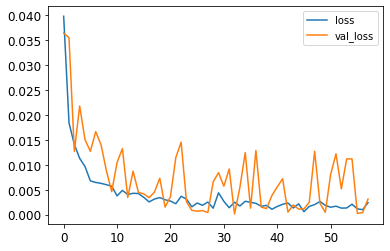

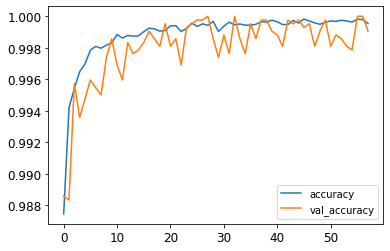

In [36]:
# Plot the loss and val_loss along with accuracy ans val_accuracy

history_df = pd.DataFrame(cnn_history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()

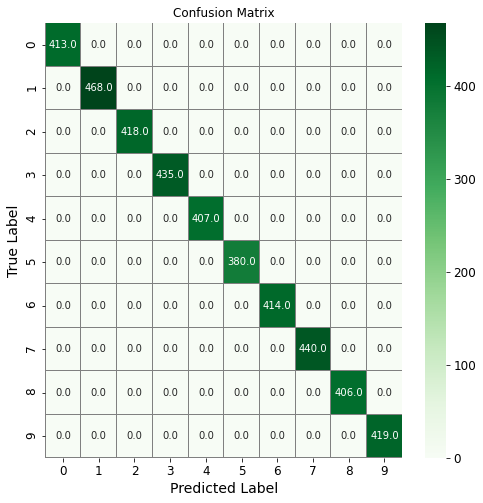

In [37]:
# confusion matrix
from sklearn.metrics import confusion_matrix

# Predict the values from the validation dataset
Y_pred = cnn_model.predict(X_test_scaled)

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 

# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 

# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [40]:
test_df = test
test_df.shape

(28000, 784)

In [41]:
test_data = test_df.values
test_data = test_data.reshape(-1, 28, 28, 1)
test_data.shape

(28000, 28, 28, 1)

In [42]:
test_data = test_data / 255.0

In [43]:
predictions = cnn_model.predict(test_data, batch_size=64)
image_id = range(1, predictions.shape[0] +1)
pred = [np.argmax(i) for i in predictions]
submission = pd.DataFrame({'ImageId': image_id, 'Label': pred})
submission.to_csv('digit_tf_sandeep_1.csv', index=False)
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


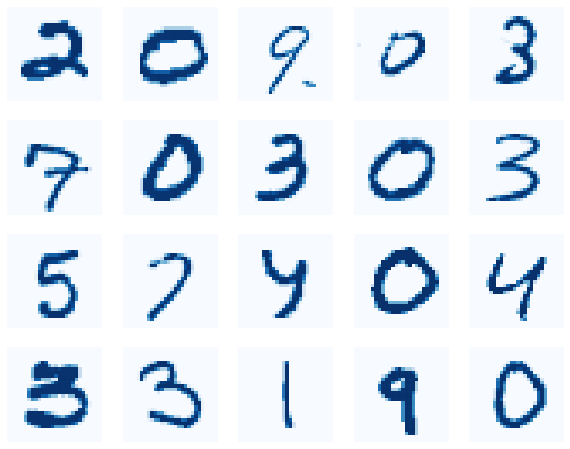

In [45]:
# Visulize data
rows = 4 # defining no. of rows in figure
cols = 5 # defining no. of colums in figure

f = plt.figure(figsize=(2*cols,2*rows)) # defining a figure 

for i in range(rows*cols): 
    f.add_subplot(rows,cols,i+1) # adding sub plot to figure on each iteration
    plt.imshow(test_data[i].reshape([28,28]), cmap="Blues") 
    plt.axis("off")

## Kaggle score with the above model
<img src="kaggle_score_digit_tf.png">

In [2]:
#Doing model with sklearn
train =pd.read_csv('digit-recognizer/train.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

In [3]:
test = pd.read_csv('digit-recognizer/test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel

In [4]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [20]:
X = train.drop("label" , axis=1)
Y = train.pop("label")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.50, random_state=1,stratify=Y)

In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21000, 784)
(21000,)
(21000, 784)
(21000,)


In [22]:
type(X_train)

pandas.core.frame.DataFrame

In [23]:
ss = StandardScaler()
X_train_scaled = pd.DataFrame(ss.fit_transform(X_train),columns=X_train.columns)
X_train_scaled.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel

In [24]:
X_test_scaled = pd.DataFrame(ss.transform(X_test),columns=X_test.columns)
X_test_scaled.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel

In [28]:
nncl = MLPClassifier(hidden_layer_sizes=100
                     ,max_iter=500
                     ,solver='sgd'
                     ,activation='relu'
                     ,random_state=1
                     ,verbose=True
                     ,tol=0.001)

In [29]:
nncl.fit(X_train_scaled,Y_train)

Iteration 1, loss = 1.56264395
Iteration 2, loss = 0.72676450
Iteration 3, loss = 0.53974542
Iteration 4, loss = 0.45226994
Iteration 5, loss = 0.39999460
Iteration 6, loss = 0.36382867
Iteration 7, loss = 0.33675446
Iteration 8, loss = 0.31543349
Iteration 9, loss = 0.29776777
Iteration 10, loss = 0.28291102
Iteration 11, loss = 0.27014313
Iteration 12, loss = 0.25903020
Iteration 13, loss = 0.24926581
Iteration 14, loss = 0.24044909
Iteration 15, loss = 0.23245305
Iteration 16, loss = 0.22515336
Iteration 17, loss = 0.21843844
Iteration 18, loss = 0.21225746
Iteration 19, loss = 0.20654800
Iteration 20, loss = 0.20115785
Iteration 21, loss = 0.19614290
Iteration 22, loss = 0.19139759
Iteration 23, loss = 0.18692472
Iteration 24, loss = 0.18270284
Iteration 25, loss = 0.17872790
Iteration 26, loss = 0.17485434
Iteration 27, loss = 0.17130137
Iteration 28, loss = 0.16774303
Iteration 29, loss = 0.16444990
Iteration 30, loss = 0.16131281
Iteration 31, loss = 0.15824086
Iteration 32, los

MLPClassifier(hidden_layer_sizes=100, max_iter=500, random_state=1,
              solver='sgd', tol=0.001, verbose=True)

In [30]:
nncl.score(X_train_scaled,Y_train)

0.9806190476190476

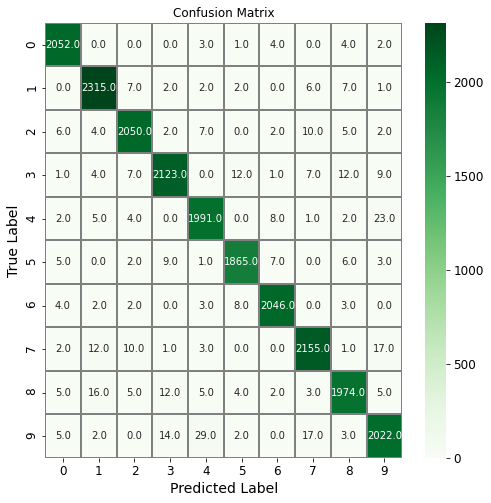

In [41]:
# confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap((metrics.confusion_matrix(y_true=Y_train,y_pred=nncl.predict(X_train_scaled))), annot=True, linewidths=0.01,cmap="Greens",linecolor="grey", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Iteration 1, loss = 2.25746011
Iteration 2, loss = 2.00223432
Iteration 3, loss = 1.73233681
Iteration 4, loss = 1.51433940
Iteration 5, loss = 1.36784927
Iteration 6, loss = 1.26223624
Iteration 7, loss = 1.18011222
Iteration 8, loss = 1.11238111
Iteration 9, loss = 1.05175611
Iteration 10, loss = 0.99595474
Iteration 11, loss = 0.94615954
Iteration 12, loss = 0.90294764
Iteration 13, loss = 0.86507300
Iteration 14, loss = 0.83287172
Iteration 15, loss = 0.80474481
Iteration 16, loss = 0.77990009
Iteration 17, loss = 0.75773558
Iteration 18, loss = 0.73770193
Iteration 19, loss = 0.71928351
Iteration 20, loss = 0.70213374
Iteration 21, loss = 0.68601444
Iteration 22, loss = 0.67107235
Iteration 23, loss = 0.65690586
Iteration 24, loss = 0.64336857
Iteration 25, loss = 0.63091058
Iteration 26, loss = 0.61910160
Iteration 27, loss = 0.60804771
Iteration 28, loss = 0.59733238
Iteration 29, loss = 0.58717215
Iteration 30, loss = 0.57744509
Iteration 31, loss = 0.56762700
Iteration 32, los

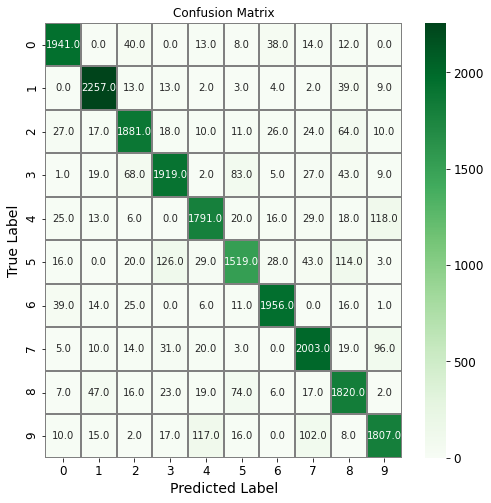

In [47]:
#With 2 hidden layers and total 10 nodes
nncl = MLPClassifier(hidden_layer_sizes=(5,5)
                     ,max_iter=100
                     ,solver='sgd'
                     ,activation='relu'
                     ,random_state=1
                     ,verbose=True
                     ,tol=0.001)
nncl.fit(X_train_scaled,Y_train)

print("model score: ",nncl.score(X_train_scaled,Y_train))
# confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap((metrics.confusion_matrix(y_true=Y_train,y_pred=nncl.predict(X_train_scaled))), annot=True, linewidths=0.01,cmap="Greens",linecolor="grey", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Iteration 1, loss = 2.26166979
Iteration 2, loss = 1.71036260
Iteration 3, loss = 1.38983526
Iteration 4, loss = 1.13893787
Iteration 5, loss = 0.98285683
Iteration 6, loss = 0.88737735
Iteration 7, loss = 0.81128257
Iteration 8, loss = 0.74265027
Iteration 9, loss = 0.67876068
Iteration 10, loss = 0.62010868
Iteration 11, loss = 0.56730225
Iteration 12, loss = 0.52004680
Iteration 13, loss = 0.48000022
Iteration 14, loss = 0.44773021
Iteration 15, loss = 0.42169447
Iteration 16, loss = 0.40070575
Iteration 17, loss = 0.38352721
Iteration 18, loss = 0.36911660
Iteration 19, loss = 0.35695225
Iteration 20, loss = 0.34632622
Iteration 21, loss = 0.33724387
Iteration 22, loss = 0.32885741
Iteration 23, loss = 0.32130023
Iteration 24, loss = 0.31453611
Iteration 25, loss = 0.30810750
Iteration 26, loss = 0.30226859
Iteration 27, loss = 0.29692706
Iteration 28, loss = 0.29182064
Iteration 29, loss = 0.28712908
Iteration 30, loss = 0.28271895
Iteration 31, loss = 0.27847529
Iteration 32, los

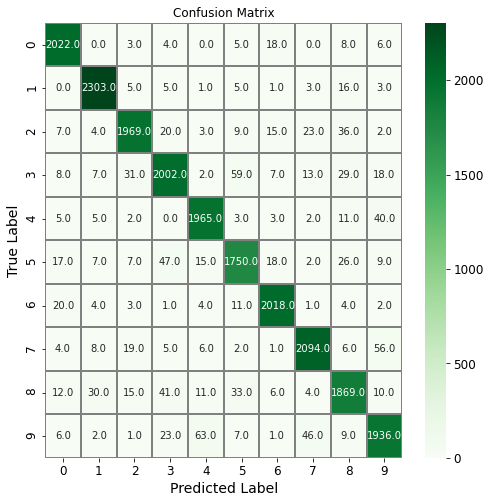

In [48]:
#With 2 hidden layers and total 20 nodes
nncl = MLPClassifier(hidden_layer_sizes=(10,10)
                     ,max_iter=100
                     ,solver='sgd'
                     ,activation='relu'
                     ,random_state=1
                     ,verbose=True
                     ,tol=0.001)
nncl.fit(X_train_scaled,Y_train)

print("model score: ",nncl.score(X_train_scaled,Y_train))
# confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap((metrics.confusion_matrix(y_true=Y_train,y_pred=nncl.predict(X_train_scaled))), annot=True, linewidths=0.01,cmap="Greens",linecolor="grey", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Iteration 1, loss = 2.33119406
Iteration 2, loss = 2.29490831
Iteration 3, loss = 2.26680028
Iteration 4, loss = 2.24098244
Iteration 5, loss = 2.21652550
Iteration 6, loss = 2.19117178
Iteration 7, loss = 2.16174904
Iteration 8, loss = 2.12806809
Iteration 9, loss = 2.09118070
Iteration 10, loss = 2.05754316
Iteration 11, loss = 2.02828660
Iteration 12, loss = 2.00284110
Iteration 13, loss = 1.97999991
Iteration 14, loss = 1.95856930
Iteration 15, loss = 1.93790433
Iteration 16, loss = 1.91957196
Iteration 17, loss = 1.90231598
Iteration 18, loss = 1.88506566
Iteration 19, loss = 1.86858903
Iteration 20, loss = 1.85332534
Iteration 21, loss = 1.83845973
Iteration 22, loss = 1.82412925
Iteration 23, loss = 1.80971277
Iteration 24, loss = 1.79583836
Iteration 25, loss = 1.78225692
Iteration 26, loss = 1.76974529
Iteration 27, loss = 1.75772217
Iteration 28, loss = 1.74597606
Iteration 29, loss = 1.73363944
Iteration 30, loss = 1.72236621
Iteration 31, loss = 1.71121382
Iteration 32, los

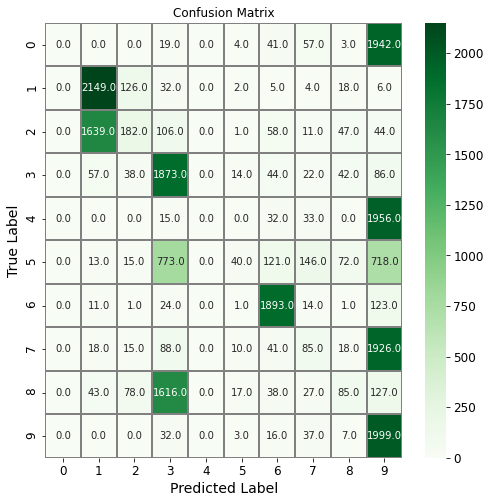

In [49]:
#With 5 hidden layers and total 10 nodes 
nncl = MLPClassifier(hidden_layer_sizes=(2,2,2,2,2)
                     ,max_iter=100
                     ,solver='sgd'
                     ,activation='relu'
                     ,random_state=1
                     ,verbose=True
                     ,tol=0.001)
nncl.fit(X_train_scaled,Y_train)

print("model score: ",nncl.score(X_train_scaled,Y_train))
# confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap((metrics.confusion_matrix(y_true=Y_train,y_pred=nncl.predict(X_train_scaled))), annot=True, linewidths=0.01,cmap="Greens",linecolor="grey", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Iteration 1, loss = 2.35040925
Iteration 2, loss = 2.34006470
Iteration 3, loss = 2.33135745
Iteration 4, loss = 2.32359233
Iteration 5, loss = 2.31555049
Iteration 6, loss = 2.30732190
Iteration 7, loss = 2.30030255
Iteration 8, loss = 2.29365568
Iteration 9, loss = 2.28699128
Iteration 10, loss = 2.28011127
Iteration 11, loss = 2.27276260
Iteration 12, loss = 2.26490695
Iteration 13, loss = 2.25628294
Iteration 14, loss = 2.24687273
Iteration 15, loss = 2.23662287
Iteration 16, loss = 2.22530128
Iteration 17, loss = 2.21291409
Iteration 18, loss = 2.19964326
Iteration 19, loss = 2.18549712
Iteration 20, loss = 2.17101805
Iteration 21, loss = 2.15630289
Iteration 22, loss = 2.14137661
Iteration 23, loss = 2.12645872
Iteration 24, loss = 2.11156518
Iteration 25, loss = 2.09698312
Iteration 26, loss = 2.08272574
Iteration 27, loss = 2.06875399
Iteration 28, loss = 2.05402111
Iteration 29, loss = 2.03942301
Iteration 30, loss = 2.02589624
Iteration 31, loss = 2.01284256
Iteration 32, los

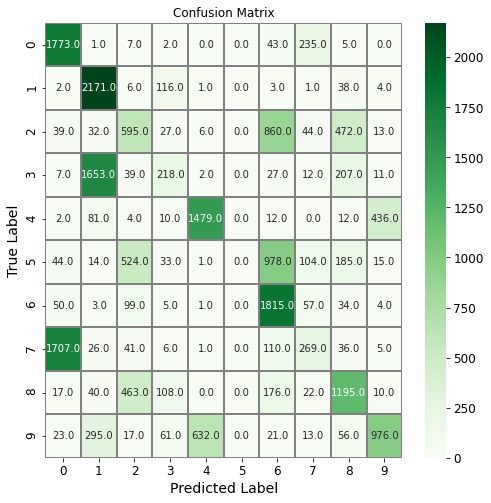

In [50]:
#With 5 hidden layers and total 20 nodes 
nncl = MLPClassifier(hidden_layer_sizes=(4,4,4,4,4)
                     ,max_iter=100
                     ,solver='sgd'
                     ,activation='relu'
                     ,random_state=1
                     ,verbose=True
                     ,tol=0.001)
nncl.fit(X_train_scaled,Y_train)

print("model score: ",nncl.score(X_train_scaled,Y_train))
# confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap((metrics.confusion_matrix(y_true=Y_train,y_pred=nncl.predict(X_train_scaled))), annot=True, linewidths=0.01,cmap="Greens",linecolor="grey", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [52]:
# Swapping train and test data to fulfil 2x2 completely crossed design
temp=X_train_scaled.copy()
X_train_scaled = X_test_scaled.copy()
X_test_scaled = temp.copy()

temp=y_train.copy()
y_train=y_test.copy()
y_test=temp.copy()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21000, 784)
(21000,)
(21000, 784)
(21000,)


Iteration 1, loss = 2.40232502
Iteration 2, loss = 2.35423825
Iteration 3, loss = 2.33587296
Iteration 4, loss = 2.32564119
Iteration 5, loss = 2.31863012
Iteration 6, loss = 2.31354344
Iteration 7, loss = 2.30975577
Iteration 8, loss = 2.30679394
Iteration 9, loss = 2.30441580
Iteration 10, loss = 2.30238486
Iteration 11, loss = 2.30062456
Iteration 12, loss = 2.29907764
Iteration 13, loss = 2.29778388
Iteration 14, loss = 2.29662823
Iteration 15, loss = 2.29564471
Iteration 16, loss = 2.29470296
Iteration 17, loss = 2.29388639
Iteration 18, loss = 2.29309451
Iteration 19, loss = 2.29245206
Iteration 20, loss = 2.29173298
Iteration 21, loss = 2.29110601
Iteration 22, loss = 2.29051915
Iteration 23, loss = 2.28995143
Iteration 24, loss = 2.28935699
Iteration 25, loss = 2.28886410
Training loss did not improve more than tol=0.001000 for 10 consecutive epochs. Stopping.
model score:  0.12914285714285714


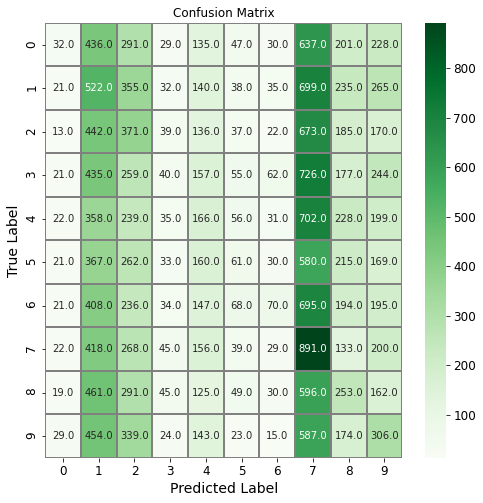

In [53]:
#With 2 hidden layers and total 10 nodes
nncl = MLPClassifier(hidden_layer_sizes=(5,5)
                     ,max_iter=100
                     ,solver='sgd'
                     ,activation='relu'
                     ,random_state=1
                     ,verbose=True
                     ,tol=0.001)
nncl.fit(X_train_scaled,Y_train)

print("model score: ",nncl.score(X_train_scaled,Y_train))
# confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap((metrics.confusion_matrix(y_true=Y_train,y_pred=nncl.predict(X_train_scaled))), annot=True, linewidths=0.01,cmap="Greens",linecolor="grey", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Iteration 1, loss = 2.50295682
Iteration 2, loss = 2.39354270
Iteration 3, loss = 2.36027209
Iteration 4, loss = 2.34235590
Iteration 5, loss = 2.33043414
Iteration 6, loss = 2.32181165
Iteration 7, loss = 2.31543119
Iteration 8, loss = 2.31037398
Iteration 9, loss = 2.30622689
Iteration 10, loss = 2.30274969
Iteration 11, loss = 2.29989007
Iteration 12, loss = 2.29742354
Iteration 13, loss = 2.29539937
Iteration 14, loss = 2.29355112
Iteration 15, loss = 2.29201432
Iteration 16, loss = 2.29058162
Iteration 17, loss = 2.28929481
Iteration 18, loss = 2.28807553
Iteration 19, loss = 2.28703944
Iteration 20, loss = 2.28606766
Iteration 21, loss = 2.28509916
Iteration 22, loss = 2.28426563
Iteration 23, loss = 2.28343418
Iteration 24, loss = 2.28263203
Iteration 25, loss = 2.28194490
Iteration 26, loss = 2.28122433
Iteration 27, loss = 2.28056120
Iteration 28, loss = 2.27987135
Iteration 29, loss = 2.27922806
Iteration 30, loss = 2.27858812
Training loss did not improve more than tol=0.001

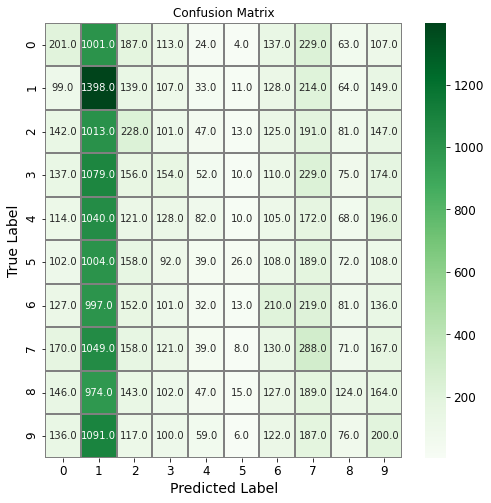

In [54]:
#With 2 hidden layers and total 20 nodes
nncl = MLPClassifier(hidden_layer_sizes=(10,10)
                     ,max_iter=100
                     ,solver='sgd'
                     ,activation='relu'
                     ,random_state=1
                     ,verbose=True
                     ,tol=0.001)
nncl.fit(X_train_scaled,Y_train)

print("model score: ",nncl.score(X_train_scaled,Y_train))
# confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap((metrics.confusion_matrix(y_true=Y_train,y_pred=nncl.predict(X_train_scaled))), annot=True, linewidths=0.01,cmap="Greens",linecolor="grey", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Iteration 1, loss = 2.35261982
Iteration 2, loss = 2.32984564
Iteration 3, loss = 2.31883063
Iteration 4, loss = 2.31160040
Iteration 5, loss = 2.30715795
Iteration 6, loss = 2.30460791
Iteration 7, loss = 2.30329648
Iteration 8, loss = 2.30243332
Iteration 9, loss = 2.30194522
Iteration 10, loss = 2.30162454
Iteration 11, loss = 2.30141763
Iteration 12, loss = 2.30126084
Iteration 13, loss = 2.30114452
Iteration 14, loss = 2.30104078
Iteration 15, loss = 2.30094014
Iteration 16, loss = 2.30089043
Iteration 17, loss = 2.30080838
Iteration 18, loss = 2.30079103
Training loss did not improve more than tol=0.001000 for 10 consecutive epochs. Stopping.
model score:  0.1158095238095238


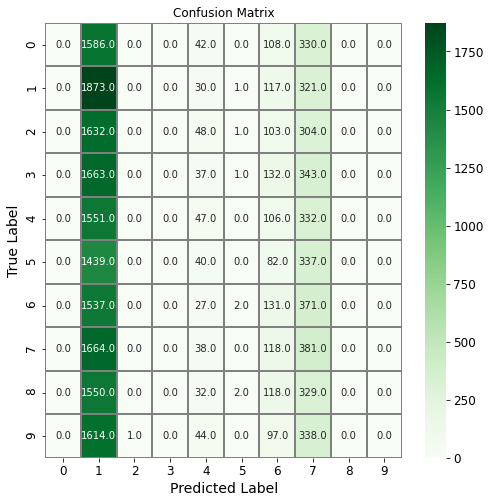

In [55]:
#With 5 hidden layers and total 10 nodes 
nncl = MLPClassifier(hidden_layer_sizes=(2,2,2,2,2)
                     ,max_iter=100
                     ,solver='sgd'
                     ,activation='relu'
                     ,random_state=1
                     ,verbose=True
                     ,tol=0.001)
nncl.fit(X_train_scaled,Y_train)

print("model score: ",nncl.score(X_train_scaled,Y_train))
# confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap((metrics.confusion_matrix(y_true=Y_train,y_pred=nncl.predict(X_train_scaled))), annot=True, linewidths=0.01,cmap="Greens",linecolor="grey", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Iteration 1, loss = 2.35099236
Iteration 2, loss = 2.34103198
Iteration 3, loss = 2.33307339
Iteration 4, loss = 2.32677133
Iteration 5, loss = 2.32173728
Iteration 6, loss = 2.31771571
Iteration 7, loss = 2.31449590
Iteration 8, loss = 2.31190749
Iteration 9, loss = 2.30983419
Iteration 10, loss = 2.30816799
Iteration 11, loss = 2.30681596
Iteration 12, loss = 2.30573213
Iteration 13, loss = 2.30485204
Iteration 14, loss = 2.30414243
Iteration 15, loss = 2.30356867
Iteration 16, loss = 2.30310634
Iteration 17, loss = 2.30272789
Iteration 18, loss = 2.30242600
Iteration 19, loss = 2.30217705
Iteration 20, loss = 2.30197532
Iteration 21, loss = 2.30181627
Iteration 22, loss = 2.30168078
Iteration 23, loss = 2.30157980
Training loss did not improve more than tol=0.001000 for 10 consecutive epochs. Stopping.
model score:  0.11228571428571428


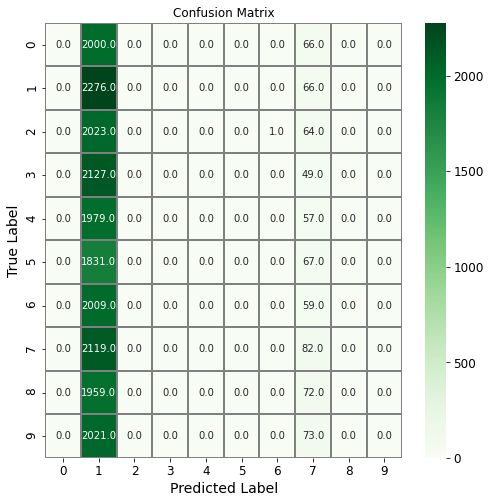

In [56]:
#With 5 hidden layers and total 20 nodes 
nncl = MLPClassifier(hidden_layer_sizes=(4,4,4,4,4)
                     ,max_iter=100
                     ,solver='sgd'
                     ,activation='relu'
                     ,random_state=1
                     ,verbose=True
                     ,tol=0.001)
nncl.fit(X_train_scaled,Y_train)

print("model score: ",nncl.score(X_train_scaled,Y_train))
# confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap((metrics.confusion_matrix(y_true=Y_train,y_pred=nncl.predict(X_train_scaled))), annot=True, linewidths=0.01,cmap="Greens",linecolor="grey", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## Kaggle score with a better model as of now
<img src="kaggle_score_digit_tf.png">